<a href="https://colab.research.google.com/github/dsurwolee/finnty/blob/master/Algo_backtesting_zipline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL ZIPLINE

In [0]:
!pip install zipline

# IMPORT LIBRARIES

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')


start = datetime(2015, 4, 1)
end = datetime(2018, 4, 30)

spy = pdr.DataReader('SPY', 'iex', start, end)
spy.index = pd.to_datetime(spy.index)

# SAMPLE DATA

In [0]:
sample = spy.sample(10)
sample

,open,high,low,close,volume
date,,,,,
2015-05-20,196.8348,197.4166,196.2383,196.5855,76857530
2015-11-06,195.6403,196.1813,194.4463,195.9201,110471473
2017-04-25,229.0227,230.0238,228.9264,229.6388,76698265
2017-02-06,219.3659,219.8030,219.0496,219.4234,57790108
2017-10-12,247.5647,247.9535,247.2779,247.5452,47065144
2016-06-21,197.4828,198.0706,196.9898,197.6155,72461663
2018-04-02,257.5536,258.1225,249.8235,252.5703,186286343
2016-04-14,196.2437,196.7436,195.8004,196.1871,65212883
2015-11-24,193.8960,195.7242,193.4669,195.2765,98874365


# SUMMARIZE DATA

In [0]:
summary = spy.describe()
summary

,open,high,low,close,volume
count,776.000000,776.000000,776.000000,776.000000,7.760000e+02
mean,215.966657,216.862271,214.974462,215.986339,9.883154e+07
std,27.147070,27.143981,27.105839,27.083814,5.010541e+07
min,171.094100,172.745500,169.257900,171.582000,2.785651e+07
25%,194.054600,195.045900,193.259500,194.287400,6.616981e+07
50%,206.406350,206.962300,205.726500,206.387150,8.680326e+07
75%,236.374000,237.176925,235.788800,236.572300,1.150962e+08
max,279.370100,280.052500,277.972900,280.005100,5.072443e+08


# VISUALIZE DATA

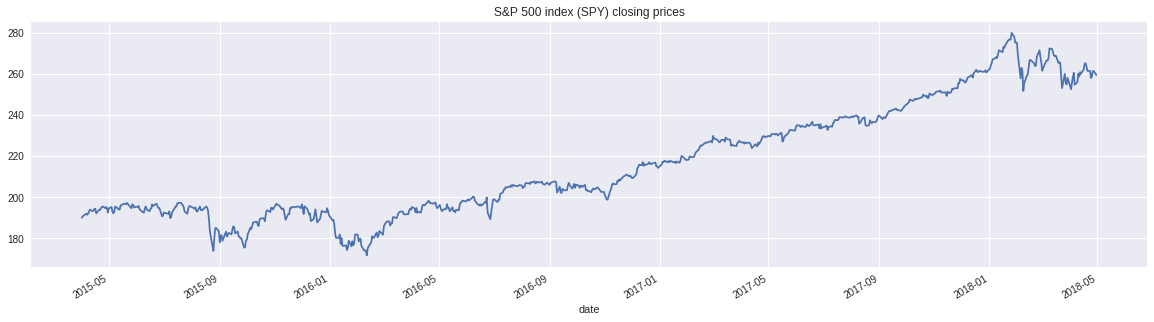

In [0]:
spy['close'].plot(figsize=(20,5), title='S&P 500 index (SPY) closing prices'), plt.show();

# **GENERATE TRADING IDEA**

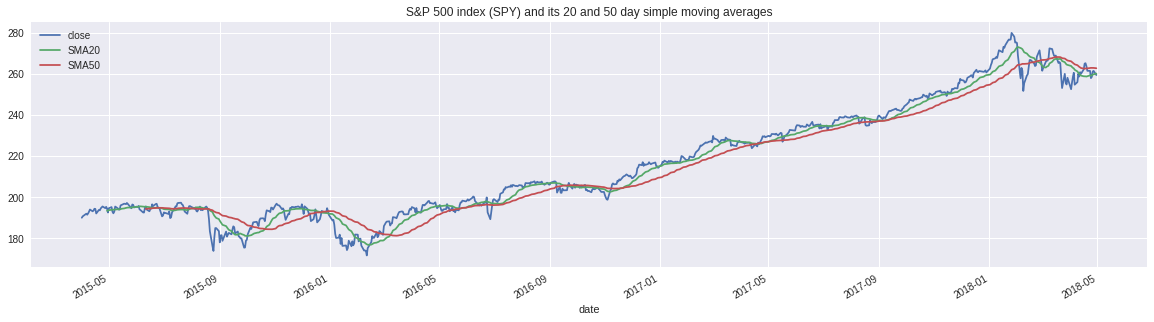

In [0]:
spy['SMA20'] = spy['close'].rolling(20).mean()
spy['SMA50'] = spy['close'].rolling(50).mean()
spy[['close', 'SMA20', 'SMA50']].plot(figsize=(20,5), grid = True, title='S&P 500 index (SPY) and its 20 and 50 day simple moving averages'), plt.show();

# BACKTEST TRADING ALGORITHM

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from zipline.api import record, symbol, order_target
from zipline.finance import commission, slippage
from zipline import run_algorithm
from zipline.data import bundles
bundles.ingest ('quantopian-quandl')
from datetime import datetime
import pytz

def initialize(context):
  context.asset = symbol('AMZN')
  context.set_commission(commission.PerShare(cost=.002, min_trade_cost=1.0))
  context.set_slippage(slippage.VolumeShareSlippage())
  

def handle_data(context, data):
  
  short_sma = data.history(context.asset, 'close', 20, '1d').mean()
  long_sma = data.history(context.asset, 'close', 50, '1d').mean()
  
  
  record(asset=data.current(context.asset,'price'), short_sma=short_sma, long_sma = long_sma)
  
  if short_sma > long_sma:
    order_target(context.asset, 100)
    
  elif short_sma < long_sma:
    order_target(context.asset, 0)
  
capital_base = 100000
start = datetime(2015, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2018, 4, 1, 0, 0, 0, 0, pytz.utc)
perf = run_algorithm(start, end, initialize, capital_base, handle_data, bundle = 'quantopian-quandl')

#EVALUATE PERFORMANCE

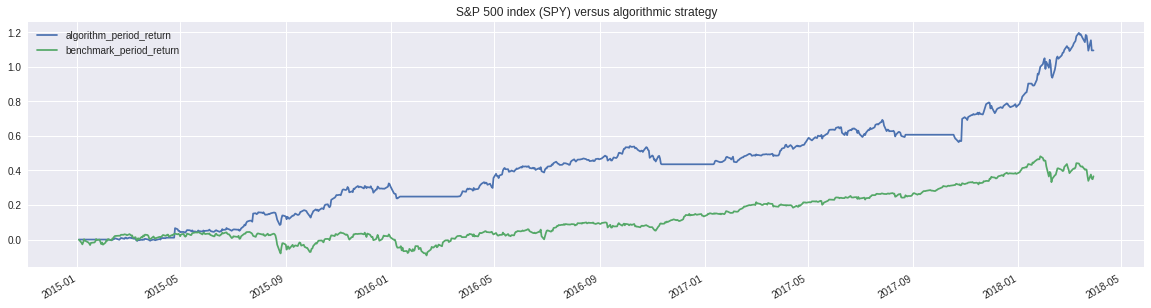

In [0]:
perf[['algorithm_period_return', 'benchmark_period_return']].plot(figsize=(20,5), title='S&P 500 index (SPY) versus algorithmic strategy'), plt.show();
  

In [0]:
perf.tail().T

,2018-03-23 20:00:00+00:00,2018-03-26 20:00:00+00:00,2018-03-27 20:00:00+00:00,2018-03-28 20:00:00+00:00,2018-03-29 20:00:00+00:00
algo_volatility,0.124688,0.125573,0.126479,0.126402,0.126326
algorithm_period_return,1.09301,1.15331,1.0945,1.0945,1.0945
alpha,0.192219,0.196245,0.189311,0.189508,0.187595
asset,1495.56,1555.86,1497.05,NaN,NaN
benchmark_period_return,0.339616,0.376267,0.352854,0.348856,0.366092
benchmark_volatility,0.129102,0.129893,0.130176,0.130109,0.130211
beta,0.451981,0.459749,0.466207,0.466168,0.464656
capital_used,0,0,0,149705,0
ending_cash,59745,59745,59745,209450,209450
ending_exposure,149556,155586,149705,0,0


In [0]:
perf[['algorithm_period_return', 'benchmark_period_return']].tail()

,algorithm_period_return,benchmark_period_return
2018-03-23 20:00:00+00:00,0.82824,0.323284
2018-03-26 20:00:00+00:00,0.88854,0.359488
2018-03-27 20:00:00+00:00,0.82973,0.336361
2018-03-28 20:00:00+00:00,0.82973,0.332412
2018-03-29 20:00:00+00:00,0.82973,0.349437


# ZIPLINE DOCUMENTATION

https://www.zipline.io